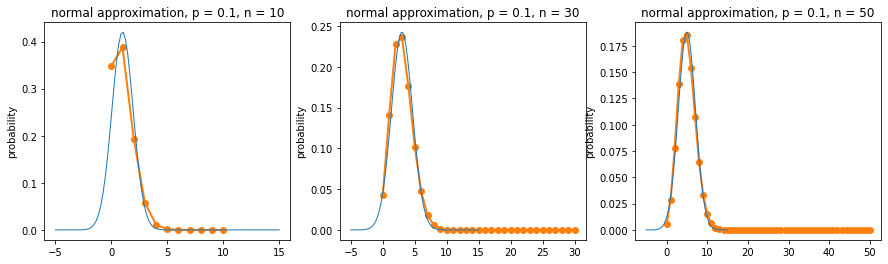

In [17]:
# 표본의 크기에 따라 이항분포의 정규근사가 어떻게 달라지는지 확인해보자.

import numpy as np
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt

p = 0.1
n = [10, 30, 50]
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

for i, ax in enumerate(axes.ravel()): # ravel()은 1차원 배열로 만들어줌
    
    # 이항 분포의 그래프를 그리는 부분
    k = np.arange(0, n[i]+1)
    px = binom.pmf(k, n = n[i], p = p)
    ax.plot(k, px, 'C1o', linewidth = 1.0)
    ax.plot(k, px, color = "C1", linewidth = 2.0) 
    
                       # 근사된 정규분포의 그래프를 그리는 부분
    x = np.linspace(-5, 15, 100, endpoint = True)
    mu = n[i] * p
    sd = np.sqrt(n[i] * p * (1-p))
    fx = norm.pdf(x, loc = mu, scale = sd)
    ax.plot(x, fx, color = "C0", linewidth = 1.0, 
             linestyle = "-") 
    
    ax.set_title("normal approximation, p = 0.1, n = %i" % n[i])
    ax.set_ylabel("probability")
plt.show()

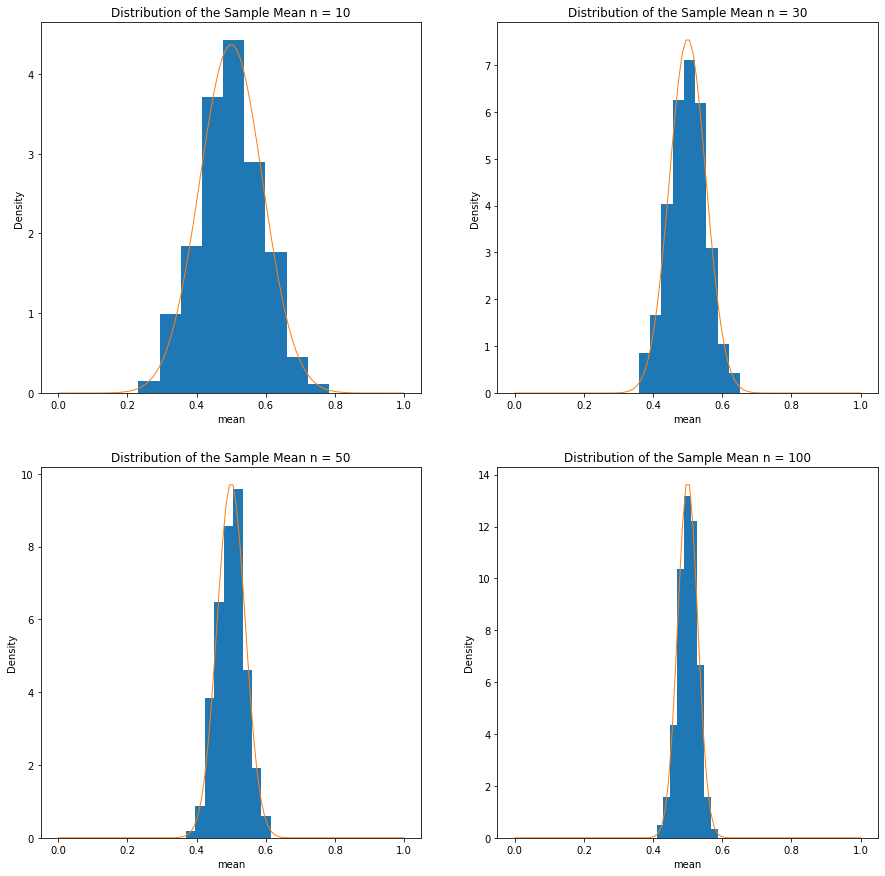

In [15]:
# 예.표본의 개수를 증가시키며 표본평균의 분포 그리기 

from scipy.stats import uniform

np.random.seed(1)       # 시드값을 설정. 예제를 반복 가능하게 만든다.
n = [10, 30, 50, 100]

plt.figure(figsize=(15,15)) # 그래프의 크기를 지정
   
for i in range(4):
    plt.subplot(2, 2, i+1)      # 4개의 그래프를 그리기 위한 준비(2행 2열, i+1번째에 자동으로 그래프 생성됨)
   
    mean = []
   
    for j in range(1001):     # 각 표본의 크기별로 1000번씩 반복
        x = uniform.rvs(loc=0, scale=1, size=n[i])
        mean.append(x.mean())
       
    plt.hist(mean, bins = 9, color = "C0", density = True, histtype='bar')
    plt.title("Distribution of the Sample Mean n = %i" % n[i])
    plt.xlabel("mean")
    plt.ylabel("Density")
   
    x = np.linspace(0, 1, 100, endpoint=True)
    mu = 0.5                       # 균등분포 U(0,1)의 모평균
    sd = np.sqrt(1/12)             # 균등분포 U(0,1)의 모표준편차
   
    fx = norm.pdf(x, loc = mu, scale = sd/np.sqrt(n[i]))
    plt.plot(x, fx, color = "C1", linewidth=1.0, linestyle="-")   # 표본평균이 근사적으로 따르는 정규분포

plt.show()